# **Tesla, Inc (TSLA) Stock Price Prediction**
![texto alternativo](http://www.pruebatucoche.es/wp-content/uploads/2015/09/Logo-Tesla.jpg)


Tesla was founded in 2003 by a group of engineers who wanted to prove that people didn’t need to compromise to drive electric – that electric vehicles can be better, quicker and more fun to drive than gasoline cars. Today, Tesla builds not only all-electric vehicles but also infinitely scalable clean energy generation and storage products. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error, make_scorer,r2_score,mean_squared_error

from IPython.display import clear_output as clean

In [0]:
#Data downloaded from Yahoo Finance TSLA 2015-2019 Data
from google.colab import files
files.upload()

In [116]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
1,2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2,2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
3,2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400
4,2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500


There are multiple variables in the dataset – Date, Open, High, Low, Adj. Close, Close, Volume.

* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
* High, Low and Adj. Close represent the maximum, minimum, and last price of the share for the day.
* Volume is the number of shares bought or sold in the day 

In [39]:
df.shape

(1051, 7)

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

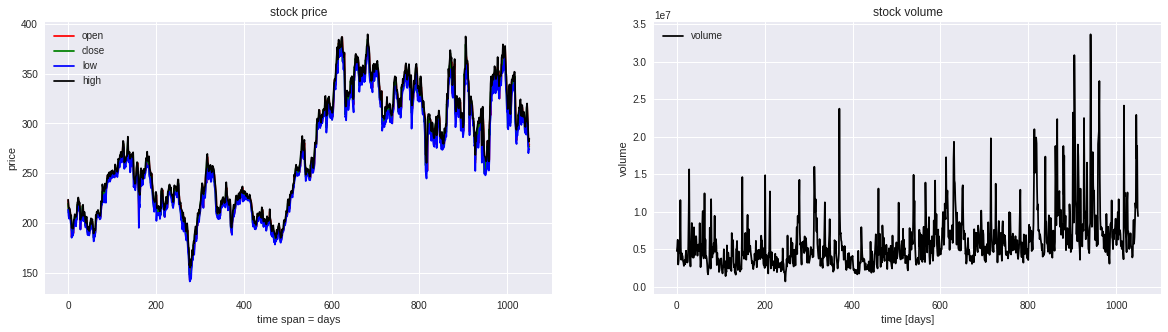

In [137]:
#Plotting features

plt.figure(figsize=(20, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time span = days')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [0]:
df_y = df.Close
df_X = df.index.tolist()

In [0]:
df_y = np.reshape(df_y,(len(df_y),1))
df_X = np.reshape(df_X,(len(df_X),1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,random_state=40, test_size=0.30) 
(X_train.shape,y_train.shape)

((735, 1), (735, 1))

In [0]:
#Preparing params for regressor
params = [{'n_estimators':np.linspace(500,1000,5,dtype=int) ,
           'learning_rate':np.linspace(0.1,0.5,5) 
                }]

In [0]:
model = xgb.XGBRegressor()
scorer =  make_scorer(r2_score)

In [0]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid=params, 
                           scoring=scorer, 
                           cv=5,
                           refit=True)

grid_result = grid_search.fit(X_train, y_train)

In [26]:
grid_opt = grid_result.best_estimator_
grid_result.best_params_

{'learning_rate': 0.1, 'n_estimators': 625}

In [132]:
xgb_predict =  grid_opt.predict(X_test)
xgb_acc = r2_score(y_test, xgb_predict)
xgb_mae = mean_absolute_error(y_test, xgb_predict)
print("R2 Score: {:.4f}\nMAE: {:.4f}".format(xgb_acc,xgb_mae))

R2 Score: 0.9843
MAE: 5.2329


In [94]:
#testing one predition
print(y_test[100],xgb_predict[100])

[225.119995] 221.25009


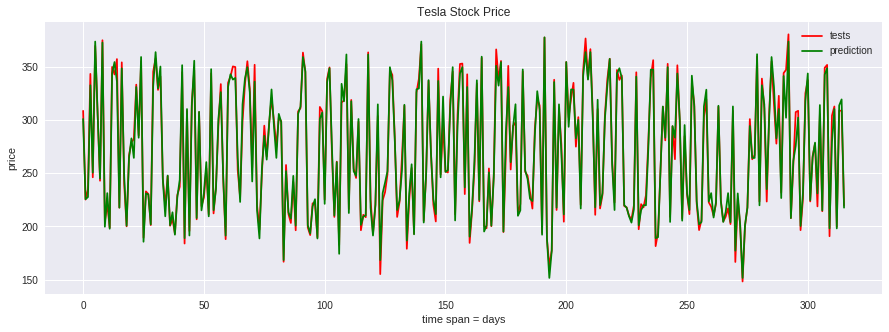

In [135]:
plt.figure(figsize=(15, 5));
plt.plot(y_test, color='red', label='tests')
plt.plot(xgb_predict, color='green', label='prediction')
plt.title('Tesla Stock Price')
plt.xlabel('time span = days')
plt.ylabel('price')
plt.legend(loc='best')

Next Step -  Try LSTM with Tensorflow 2.0